# Seaborn

Let's take a few minutes to do a quick orientation to Seaborn.  Seaborn is a graphing library built on top of matplotlib.  It's oriented towards statistical analysis, which means that it's a bit outside the scope of this class.  Nonetheless, it's a library I use a lot, and it's good to know a little bit about it.

By convention, we import seaborn as sns

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Let's check out a dataset of house prices.  These are taken from the real estate pages of the Boston Globe during 1990.

In [3]:
H = pd.read_csv('house.csv')
H.head()

,price,assess,bdrms,lotsize,sqrft,colonial
0,300.0,349.100006,4,6126,2438,1
1,370.0,351.500000,3,9903,2076,1
2,191.0,217.699997,3,5200,1374,0
3,195.0,231.800003,3,4600,1448,1
4,373.0,319.100006,4,6095,2514,1


You already know that you can create a scatterplot of price against square feet using matplotlit.

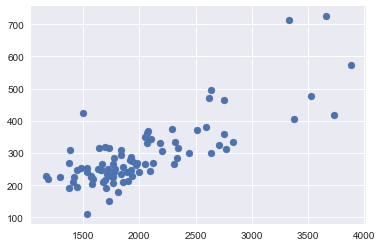

In [4]:
plt.scatter('sqrft','price', data = H)

In a typical workflow, you might create a scatterplot like this, then compute the best-fit regression line using the statistics package `statsmodels`.  You would then overlay the trend line on top of the scatterplot.

Seaborn does all of this for you.

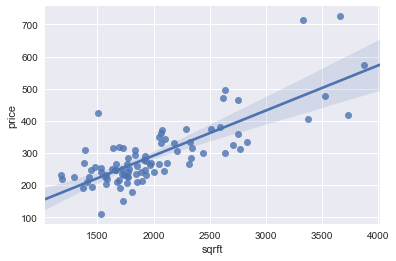

In [5]:
sns.regplot('sqrft','price', data = H)

You also get a shaded region representing a 95% confidence interval, which is something you'll encounter in your statistics class.  At an extremely high level, it represents a set of regression lines that are reasonable guesses for the true relationship.

Seaborn also has a fully featured barplot method.  You can create barplots with matplotlib, but seaborn makes it easy to do more fancy things.  Here, let's take a look at the mean house price, grouped by number of rooms and whether the house is colonial.

/Users/paul/anaconda/envs/py36/lib/python3.6/site-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


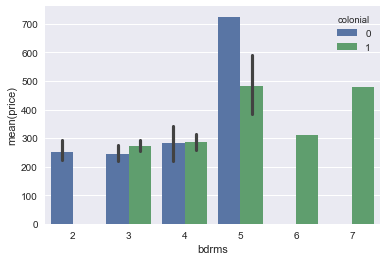

In [6]:
sns.barplot(x = 'bdrms', y = 'price', hue = 'colonial', data = H)

Seaborn also puts error bars in automatically.  This is something else you'll study in your statistics class, but at a very high level, it's a way of estimating how much uncertainty there is in each mean.  You can see, however, that some of the bars don't have error bars.  There's no way to calculate the uncertainly if there is only one data point.

Finally, I reach for seaborn when I want to make a nice correlation heatmap.

In [7]:
c = H.corr()
c

,price,assess,bdrms,lotsize,sqrft,colonial
price,1.000000,0.905279,0.508084,0.347124,0.787907,0.137946
assess,0.905279,1.000000,0.482474,0.328146,0.865634,0.082936
bdrms,0.508084,0.482474,1.000000,0.136326,0.531474,0.304575
lotsize,0.347124,0.328146,0.136326,1.000000,0.183842,0.014019
sqrft,0.787907,0.865634,0.531474,0.183842,1.000000,0.065421
colonial,0.137946,0.082936,0.304575,0.014019,0.065421,1.000000


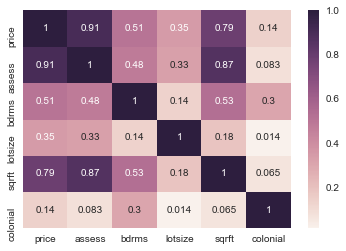

In [8]:
sns.heatmap(c, annot = True)

To lower redundancy and save ink, we'll often want to hide the upper-right triangle, which is the mirror image of the lower-left.

We can do this using the `mask` argument.

In [9]:
mask = np.ones_like(c, dtype = np.bool)
mask = np.triu(mask)
mask

array([[ True,  True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True],
       [False, False, False, False,  True,  True],
       [False, False, False, False, False,  True]], dtype=bool)

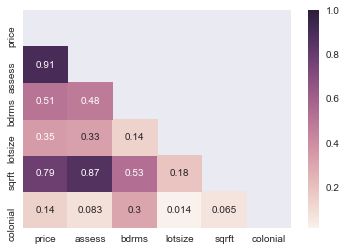

In [10]:
sns.heatmap(c, annot = True, mask = mask)

Let's change up the colors and remove that colorbar.

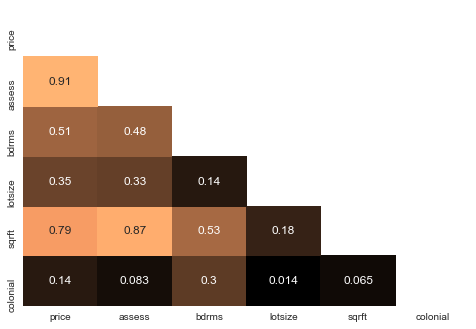

In [11]:
sns.set(style="white")
sns.heatmap(c, annot = True, mask = mask, cmap = 'copper', cbar = False, )

As they say, now you know just enough to be dangerous.